# Figure 1: Mean Squared Error as a function of the samples per site and sites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../outputs/run_4000samples.csv')
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_std,N,k,n,kappa_within_site,site_lat,outlier_rate,ignore_outliers,site_long
0,0,19.496916,16.339119,15.099077,1,1,1,50,30,0.00,False,0
1,0,16.912770,14.150932,12.975464,2,2,1,50,30,0.00,False,0
2,0,16.292285,13.124656,14.344593,3,3,1,50,30,0.00,False,0
3,0,15.993276,13.044046,13.439576,4,4,1,50,30,0.00,False,0
4,0,15.659231,12.496678,13.611770,5,5,1,50,30,0.00,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,4.162730,3.864083,2.281513,100,5,20,50,30,0.05,False,0
904,0,4.033516,3.746264,2.158736,120,6,20,50,30,0.05,False,0
905,0,3.948453,3.634248,2.138716,140,7,20,50,30,0.05,False,0
906,0,3.814922,3.539819,2.075126,160,8,20,50,30,0.05,False,0


### Plot Function

In [296]:
# from scipy.ndimage.filters import gaussian_filter

def contour_from_pandas(df_, a_max=15):

    X = df_.columns.values
    Y = df_.index.values
    Z = df_.values
    Z_smooth = gaussian_filter(Z, 1.0)
    
    Z = np.clip(Z, a_min=0.0, a_max=a_max)
    Z_rounded = np.rint(Z)
    
    x,y = np.meshgrid(X, Y)

    bounds = np.arange(0.0, 16.0, 1.0)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    ax.set_aspect("equal")
    
    ColorGrid = ax.pcolormesh(x, y, Z_rounded, cmap="viridis", alpha=0.8, vmin=0, vmax=a_max)
    # CS1 = ax.contour(x, y, Z, 10, colors='k', levels=np.arange(0.0, 16.0, 1.0))
    ContourLines = ax.contour(x, y, Z, 10, colors='k', levels=bounds)
    # CS2 = ax.pcolormesh(x, y, Z, cmap='viridis', alpha=0.8)
    
    N = x * y
    IsoNLines = ax.contour(x, y, N, 6, colors='w', linestyles="dashed", levels=np.arange(0.0, 210.0, 20.0))

    ax.clabel(IsoNLines, inline=True, fontsize=6)
    ax.clabel(ContourLines, inline=True, fontsize=14)
    ax.set_xticks(df_.columns.values)
    ax.set_yticks(df_.index.values)
    ax.set_xlim([0, np.max(df_.columns.values)])
    ax.set_ylim([0, np.max(df_.index.values)])
    ax.set_xlabel('Number of Samples per Site')
    ax.set_ylabel('Number of Sites (N)')
    cbar = plt.colorbar(ColorGrid, boundaries=bounds, fraction=0.02, location='right')
    cbar.set_label("Means squared error to the true pole", rotation=270)
     
    plt.savefig("Figure1.png", dpi=300, format="png")

In [297]:
np.unique(df.outlier_rate), np.unique(df.kappa_within_site), np.unique(df.site_lat)

(array([0.  , 0.05]), array([50]), array([30]))

In [298]:
all_kappa = np.unique(df.kappa_within_site.values)

df_filter = df[(df.site_lat==30) 
             & (df.kappa_within_site==50)
             & (df.outlier_rate==0.05) 
             & (df.ignore_outliers==False)]

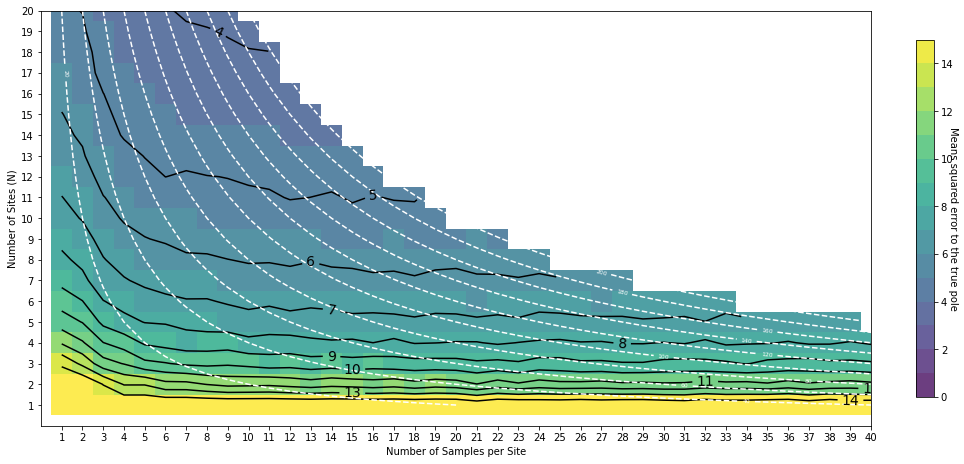

In [299]:
contour_from_pandas(df_filter.pivot('n', 'k', 'error_angle_mean'))

In [13]:
df_filter.pivot('n', 'k', 'error_angle_mean')

k,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
n,,,,,,,,,,,,,,,,,,,,,
1,22.279806,20.632966,18.661644,17.788146,16.656615,16.740957,15.994219,15.794121,15.941113,15.411854,...,14.775819,15.171004,14.842510,14.832571,15.168876,15.001662,14.771773,15.175043,14.762207,14.838464
2,17.452298,15.695312,13.962446,12.931939,12.933139,12.305862,12.295318,11.966991,11.712879,11.753801,...,11.146185,11.359710,11.236985,11.292537,11.113062,11.369670,11.113578,11.280509,11.370765,11.213758
3,13.813718,12.756678,11.401945,10.945487,10.222286,10.055981,9.818311,9.727806,9.845303,9.691764,...,9.305840,9.208958,9.137758,8.951729,9.225534,9.281252,9.360353,9.171172,9.184822,9.108702
4,11.896483,11.100957,10.019169,9.527271,8.871124,8.659101,8.472517,8.501146,8.545195,8.239390,...,7.936762,8.174321,7.866978,7.933889,7.949010,8.061488,7.901079,7.917510,8.064234,7.902631
5,10.472529,9.961673,8.756959,8.267142,7.969676,7.921075,7.710792,7.557205,7.482651,7.398665,...,7.121709,7.015619,7.345315,7.170010,7.152246,7.171435,7.169333,7.144899,7.011720,NaN
6,9.582489,9.019833,8.031060,7.676012,7.400400,7.207498,7.052119,7.064121,6.910086,6.738416,...,6.663733,6.514219,6.519715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.695744,8.261829,7.334148,7.079534,6.798731,6.617660,6.586988,6.532229,6.404187,6.309634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.203611,7.743742,7.052820,6.630972,6.373571,6.324406,6.116537,6.116668,6.011358,5.932632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7.752689,7.364070,6.677870,6.319355,6.032225,5.907793,5.773364,5.706740,5.612983,5.671562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
